# Holiday Modeling Using Google Trends Data

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from holidays.countries import Bangladesh

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib

import cmdstanpy
cmdstanpy.install_cmdstan()
from cmdstanpy import CmdStanModel

from bayesian_holidays.src.holiday_model import fit_holiday_model
from bayesian_holidays.src.plot_utils import (
    plot_posteriors,
    get_individual_holidays,
    plot_individual_holidays
)

CmdStan install directory: /Users/daniel.marthaler/.cmdstan
CmdStan version 2.34.1 already installed
Test model compilation


### Choose data and fit model

In [7]:
df_xmas, fit_xmas = fit_holiday_model(
    "chocolate",
    start_date=None,
    train_split=80,
    num_chains=4,
    max_treedepth=13,
    adapt_delta=0.9
)


11:25:26 - cmdstanpy - INFO - Chain [1] start processing
11:25:27 - cmdstanpy - INFO - Chain [1] done processing
11:25:27 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:25:39 - cmdstanpy - INFO - CmdStan done processing.
11:25:39 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1 divergent transitions (0.4%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


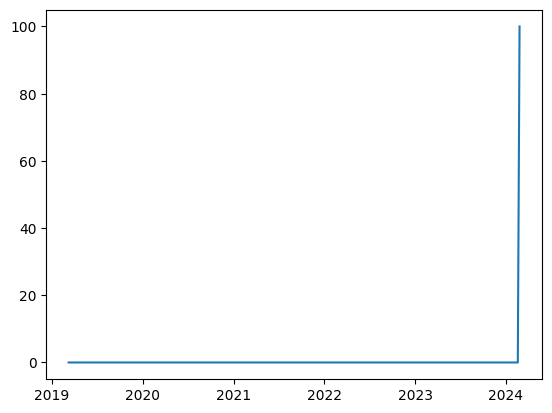

In [12]:
plt.plot(df_xmas['date'],df_xmas['observed'])

### Plot posterior in hold out set

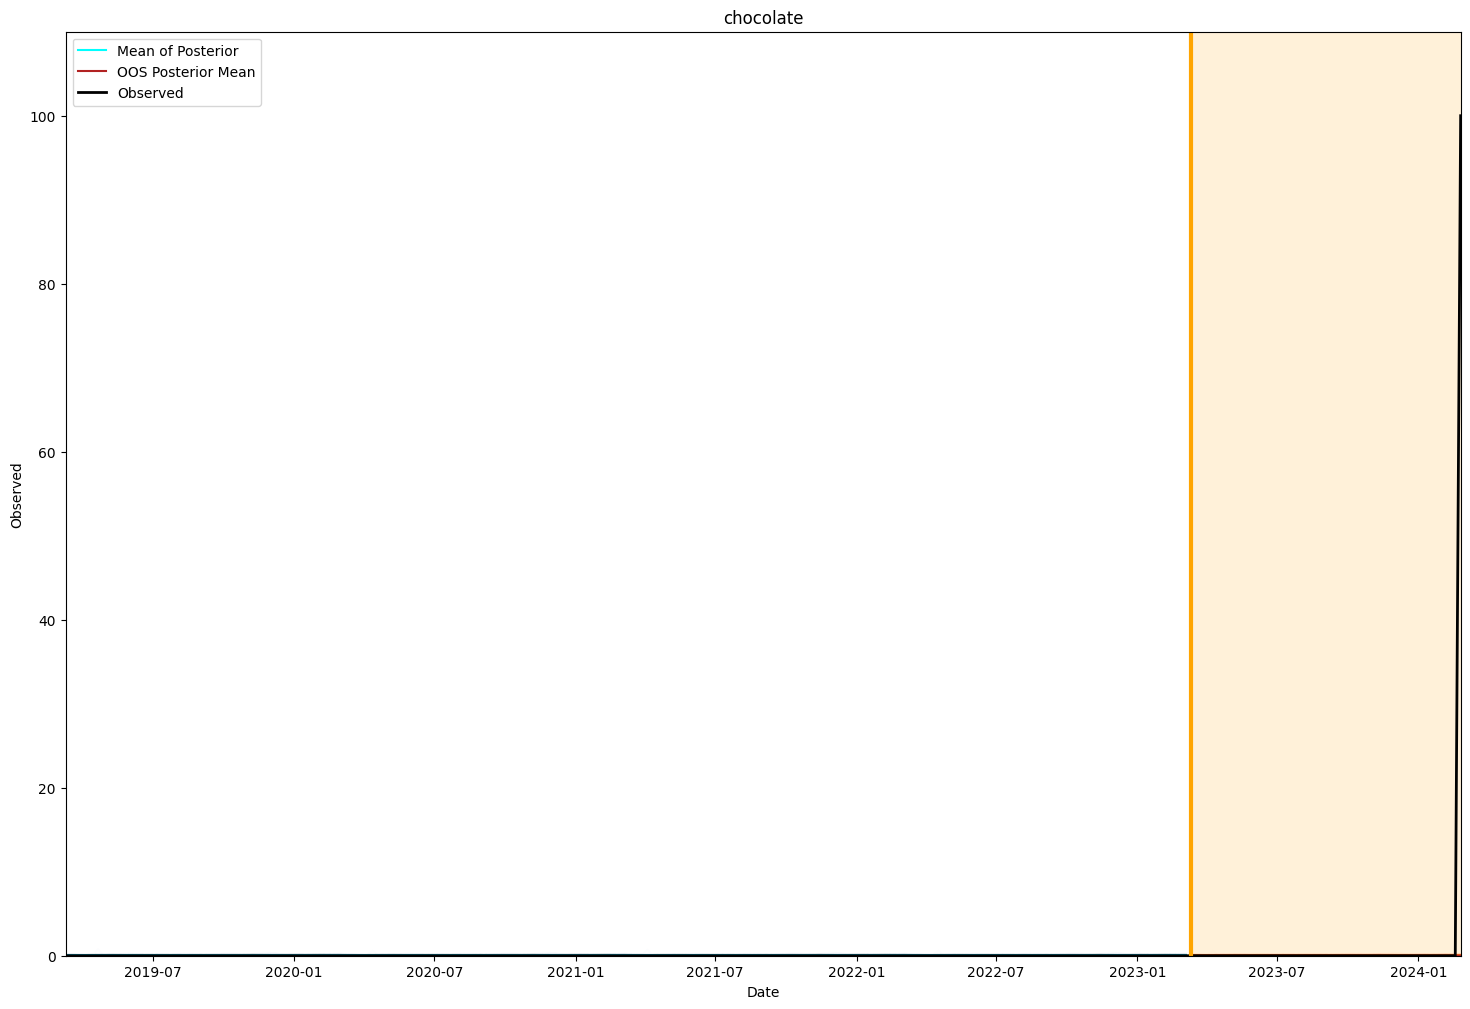

In [8]:
plot_posteriors(df_xmas, fit_xmas, "chocolate")

### Plot Holiday Components for this search term

In [9]:
holiday_list, hols_train, hols_test, df_train, df_test = get_individual_holidays(df_xmas, fit_xmas)

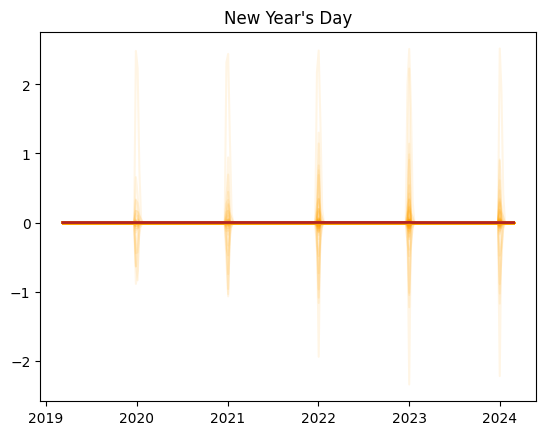

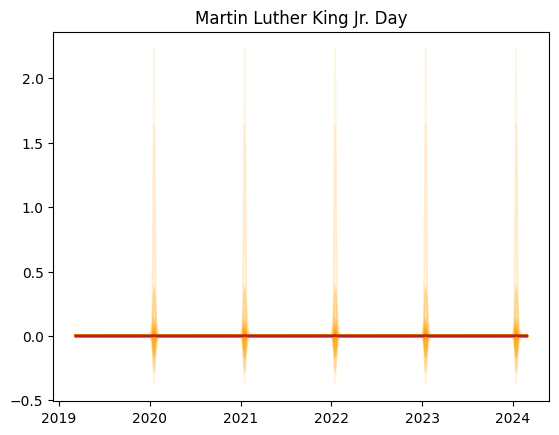

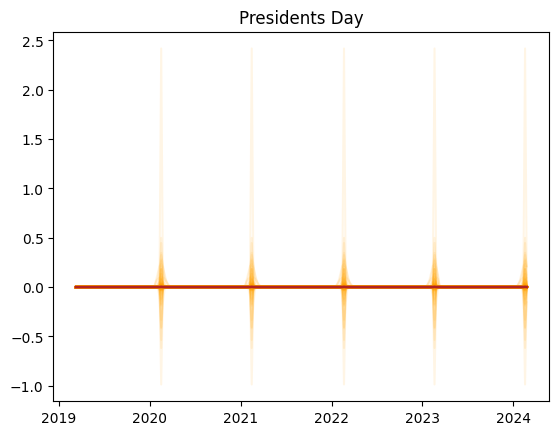

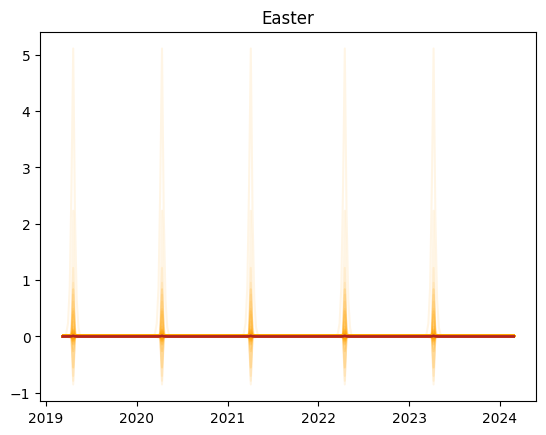

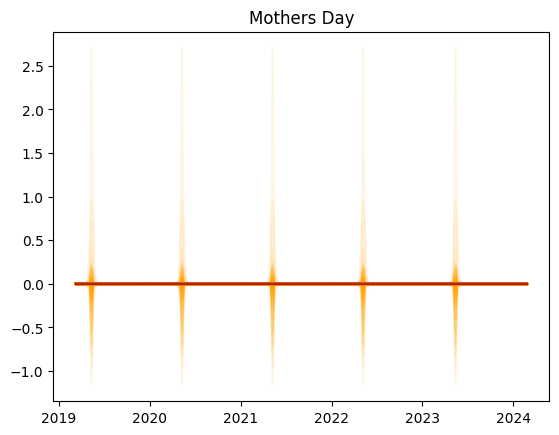

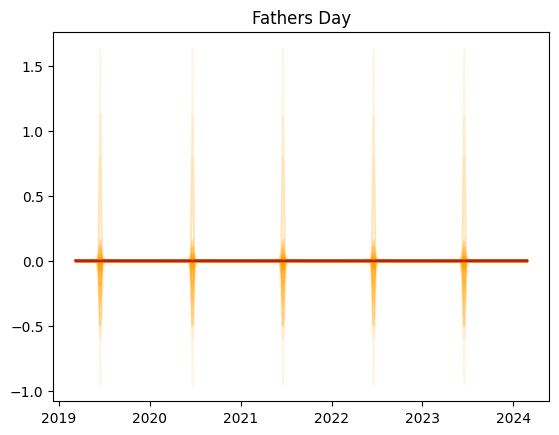

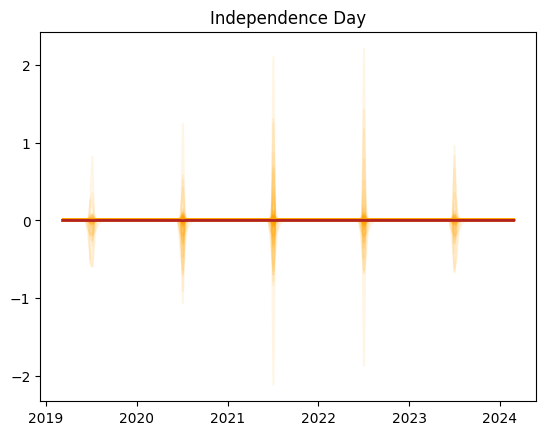

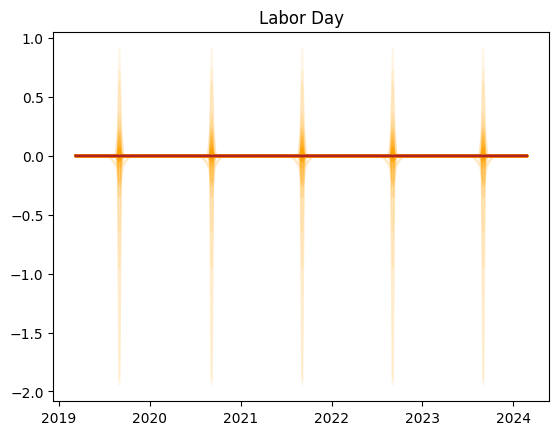

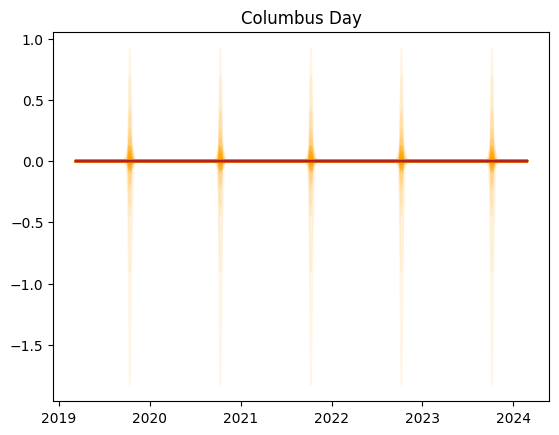

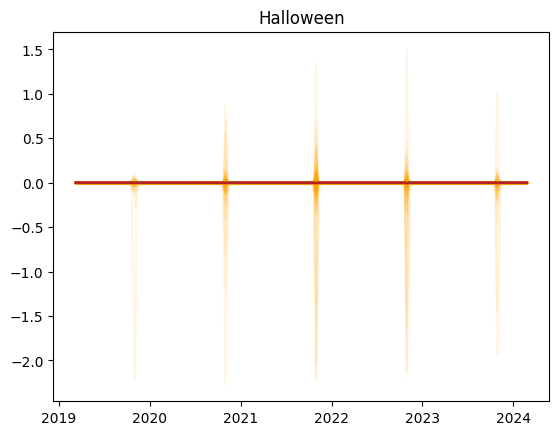

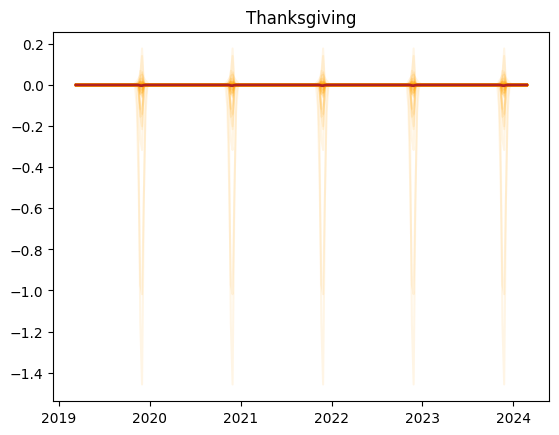

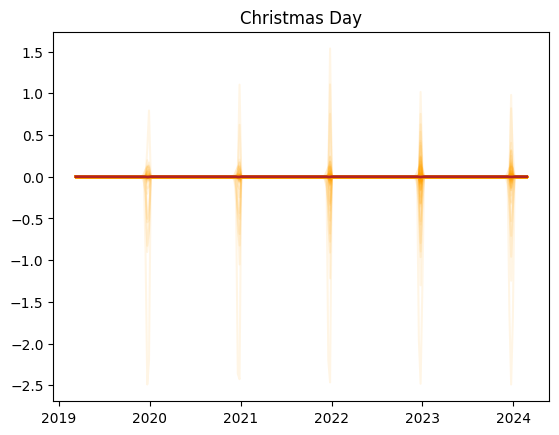

In [10]:
plot_individual_holidays(df_xmas.date,np.concatenate((hols_train, hols_test), axis=2), holiday_list.head(hols_test.shape[1]).HolidayName.values)